# Reading CSV file

In [1]:
train_df=read.csv("/kaggle/input/titanic/train_and_test2.csv")
head(train_df,5)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,⋯,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,X2urvived
,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,22,7.2500,0,1,0,0,0,0,0,⋯,0,0,0,3,0,0,2,0,0,0
2,2,38,71.2833,1,1,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,1
3,3,26,7.9250,1,0,0,0,0,0,0,⋯,0,0,0,3,0,0,2,0,0,1
4,4,35,53.1000,1,1,0,0,0,0,0,⋯,0,0,0,1,0,0,2,0,0,1
5,5,35,8.0500,0,0,0,0,0,0,0,⋯,0,0,0,3,0,0,2,0,0,0


# Remove unnecessary columns

In [2]:
# Here we have many columns starting with the string "zero", so removing all that using string matching
cols=colnames(train_df)
lst=grep('zero', cols)
df <- train_df[ , -lst ]
head(df)

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,X2urvived
,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,22,7.2500,0,1,0,3,2,0
2,2,38,71.2833,1,1,0,1,0,1
3,3,26,7.9250,1,0,0,3,2,1
4,4,35,53.1000,1,1,0,1,2,1
5,5,35,8.0500,0,0,0,3,2,0
6,6,28,8.4583,0,0,0,3,1,0


# Data Analysis

In [3]:
summary(df)

  Passengerid        Age             Fare              Sex       
 Min.   :   1   Min.   : 0.17   Min.   :  0.000   Min.   :0.000  
 1st Qu.: 328   1st Qu.:22.00   1st Qu.:  7.896   1st Qu.:0.000  
 Median : 655   Median :28.00   Median : 14.454   Median :0.000  
 Mean   : 655   Mean   :29.50   Mean   : 33.281   Mean   :0.356  
 3rd Qu.: 982   3rd Qu.:35.00   3rd Qu.: 31.275   3rd Qu.:1.000  
 Max.   :1309   Max.   :80.00   Max.   :512.329   Max.   :1.000  
                                                                 
     sibsp            Parch           Pclass         Embarked    
 Min.   :0.0000   Min.   :0.000   Min.   :1.000   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:2.000   1st Qu.:1.000  
 Median :0.0000   Median :0.000   Median :3.000   Median :2.000  
 Mean   :0.4989   Mean   :0.385   Mean   :2.295   Mean   :1.493  
 3rd Qu.:1.0000   3rd Qu.:0.000   3rd Qu.:3.000   3rd Qu.:2.000  
 Max.   :8.0000   Max.   :9.000   Max.   :3.000   Max.   :2.000  
          

# Data manipulation in R

In [4]:
# To access a column value df$col[i]
df$Fare[1]

[1] 7.25

In [5]:
# to initialize a variable

x<-10
print(x)

[1] 10


# Model implementation

In [6]:
# Let's use a decision tree
library(dplyr)
df<- select (df,-c(Passengerid)) # removing column Id
head(df)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,X2urvived
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,22,7.2500,0,1,0,3,2,0
2,38,71.2833,1,1,0,1,0,1
3,26,7.9250,1,0,0,3,2,1
4,35,53.1000,1,1,0,1,2,1
5,35,8.0500,0,0,0,3,2,0
6,28,8.4583,0,0,0,3,1,0


In [7]:
library(caTools) #for .split() function

sample_data = sample.split(df, SplitRatio = 0.8)
train_data <- subset(df, sample_data == TRUE)
test_data <- subset(df, sample_data == FALSE)

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich



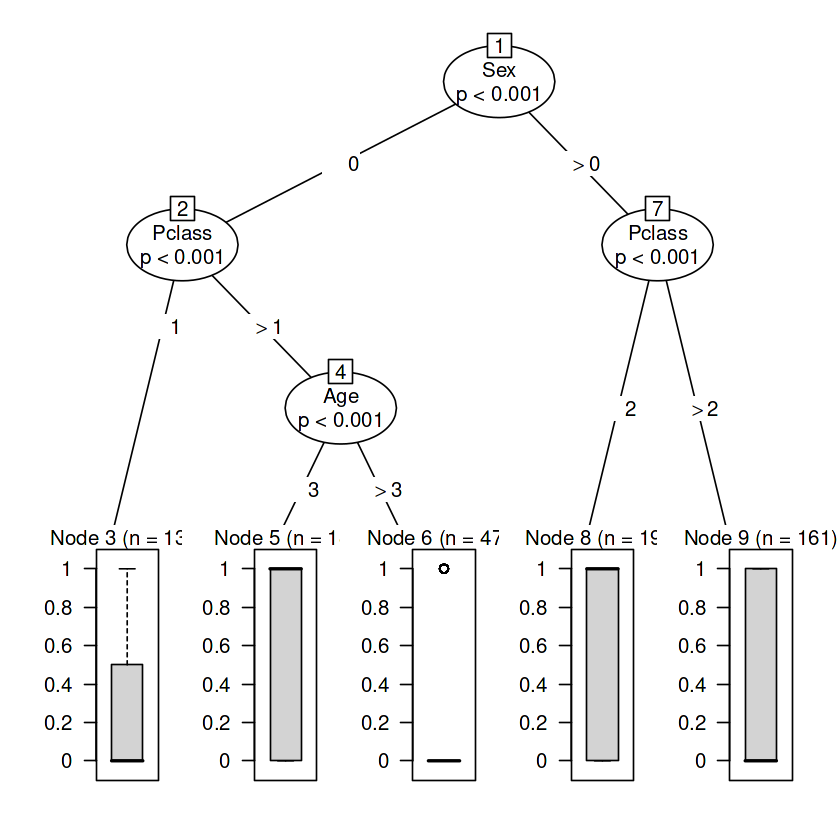

In [8]:
library(party) # for ctree

model<- ctree(X2urvived ~ ., train_data)
plot(model)

# Prediction

In [9]:
# actual v/s predicted values
predict_model<-predict(model , test_data)
m_at <- table(test_data$X2urvived, round(predict_model))
m_at

   
      0   1
  0 221  25
  1  45  36

In [10]:
ac_Test <- (sum(diag(m_at)) / sum(m_at)) * 100
print(paste('Accuracy for test is found to be', ac_Test))

[1] "Accuracy for test is found to be 78.5932721712538"
